# 스포츠 센터 고객 데이터 분석
## 고객의 소리:  
"제가 운영하는 스포츠 센터는 트레이닝 붐 덕분에 지금까지 고객 수가 늘었습니다. 그런데 최근 1년간 고객 수가 늘지 않는 것 같습니다. 자주 이용하는 고객은 계속 오지만, 가끔 오는 고객은 어느새 오지 않는 경우도 생기는 것 같습니다. 제대로 데이터를 분석한 적이 없어서 어떤 고객이 계속 이용하고 있는지조차 모릅니다. 데이터 분석을 하면 뭔가 알 수 있을까요?"

## 전제 조건:  

스포츠 센터에는 3종류의 회원 구분이 있습니다: 센터를 언제든 사용할 수 있는 종일 회원, 낮에만 사용할 수 있는 주간회원, 밤에만 사용할 수 있는 야간회원  
일반적으로 입회비가 필요하지만, 비정기적으로 입회비 반액 할인이나 입회비 무료 행사를 진행하여 신규회원을 유치하고 있습니다  
탈퇴하려면 월말까지 신청해야 하며, 그 다음 달 말에 탈퇴가 처리됩니다  


## 분석할 데이터:
use_log.csv: 센터 이용 이력 데이터 (2018년 4월~2019년 3월)  
customer_master.csv: 2019년 3월 말 시점의 회원 데이터  
class_master.csv: 회원 구분 데이터(종일, 주간, 야간)  
campaign_master.csv: 행사 구분 데이터(입회비 유무 등)  

In [105]:
import pandas as pd

# 데이터를 읽어들이고 확인기

In [106]:
use_log = pd.read_csv("./data/use_log.csv")
use_log.shape

(197428, 3)

In [107]:
use_log.head()

log_id customer_id     usedate
0  L00000049012330    AS009373  2018-04-01
1  L00000049012331    AS015315  2018-04-01
2  L00000049012332    AS040841  2018-04-01
3  L00000049012333    AS046594  2018-04-01
4  L00000049012334    AS073285  2018-04-01

In [108]:
customer_master = pd.read_csv("./data/customer_master.csv")
customer_master.shape

(4192, 8)

In [109]:
customer_master.head()

customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted  
0           0  
1           0  
2           0  
3           0  
4           0

In [110]:
class_master = pd.read_csv("./data/class_master.csv")
class_master.shape

(3, 3)

In [111]:
class_master.head()

class class_name  price
0   C01       0_종일  10500
1   C02       1_주간   7500
2   C03       2_야간   6000

In [112]:
campaign_master = pd.read_csv("./data/campaign_master.csv")
campaign_master.shape

(3, 2)

In [113]:
campaign_master.head()

campaign_id campaign_name
0         CA1          2_일반
1         CA2     0_입회비반액할인
2         CA3       1_입회비무료

# # 데이터 가공

In [114]:
customer_join = pd.merge(customer_master, class_master, on="class", how="left")
customer_join.head()

customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted class_name  price  
0           0       0_종일  10500  
1           0       0_종일  10500  
2           0       0_종일  10500  
3           0       0_종일  10500  
4           0       2_야간   6000

In [115]:
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

customer_id   name class gender           start_date end_date campaign_id  \
0    OA832399   XXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
1    PL270116  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
2    OA974876  XXXXX   C01      M  2015-05-01 00:00:00      NaN         CA1   
3    HD024127  XXXXX   C01      F  2015-05-01 00:00:00      NaN         CA1   
4    HD661448  XXXXX   C03      F  2015-05-01 00:00:00      NaN         CA1   

   is_deleted class_name  price campaign_name  
0           0       0_종일  10500          2_일반  
1           0       0_종일  10500          2_일반  
2           0       0_종일  10500          2_일반  
3           0       0_종일  10500          2_일반  
4           0       2_야간   6000          2_일반

In [116]:
print(customer_master.shape[0], customer_join.shape[0])

4192 4192


In [117]:
# 결측치 확인
customer_join.isnull().mean() * 100

customer_id       0.000000
name              0.000000
class             0.000000
gender            0.000000
start_date        0.000000
end_date         67.795802
campaign_id       0.000000
is_deleted        0.000000
class_name        0.000000
price             0.000000
campaign_name     0.000000
dtype: float64

In [118]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 360.4+ KB


# 고객데이터 집계

In [119]:
customer_join.groupby("class_name")["customer_id"].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [120]:
customer_join.groupby("campaign_name")["customer_id"].count()

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [121]:
customer_join.groupby("gender")["customer_id"].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [122]:
customer_join.groupby("is_deleted")["customer_id"].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [123]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_join["start_date"].dtype

dtype('<M8[ns]')

In [124]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   object        
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 360.4+ KB


In [125]:
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
customer_start.shape

(1361, 11)

# 활동 고객 데이터를 집계
활동 곡객의 기준 : 탈퇴일이 2019년 03월 31일 이후 고객과 탈퇴일이 na인 고객

In [126]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

In [127]:
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
customer_newer.shape

(2953, 11)

In [128]:
customer_newer["end_date"].unique()

<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [129]:
customer_newer.groupby("class_name")["customer_id"].count()

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [130]:
customer_newer.groupby("campaign_name")["customer_id"].count()

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [131]:
customer_newer.groupby("gender")["customer_id"].count()

gender
F    1400
M    1553
Name: customer_id, dtype: int64

# 이용이력 데이터 집계

In [132]:
use_log["usedate"] = pd.to_datetime(use_log["usedate"])
use_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.5+ MB


In [133]:
use_log.head()

log_id customer_id    usedate
0  L00000049012330    AS009373 2018-04-01
1  L00000049012331    AS015315 2018-04-01
2  L00000049012332    AS040841 2018-04-01
3  L00000049012333    AS046594 2018-04-01
4  L00000049012334    AS073285 2018-04-01

In [134]:
use_log["연월"] = use_log["usedate"].dt.strftime("%Y%m")
use_log.head()

log_id customer_id    usedate      연월
0  L00000049012330    AS009373 2018-04-01  201804
1  L00000049012331    AS015315 2018-04-01  201804
2  L00000049012332    AS040841 2018-04-01  201804
3  L00000049012333    AS046594 2018-04-01  201804
4  L00000049012334    AS073285 2018-04-01  201804

In [135]:
use_log_months = use_log.groupby(["연월", "customer_id"], as_index=False).count()
use_log_months.head()

연월 customer_id  log_id  usedate
0  201804    AS002855       4        4
1  201804    AS009013       2        2
2  201804    AS009373       3        3
3  201804    AS015315       6        6
4  201804    AS015739       7        7

In [136]:
use_log_months.rename(columns={"log_id" : "count"}, inplace=True)
use_log_months.drop(["usedate"], axis=1, inplace=True)
use_log_months.head()

연월 customer_id  count
0  201804    AS002855      4
1  201804    AS009013      2
2  201804    AS009373      3
3  201804    AS015315      6
4  201804    AS015739      7

In [137]:
use_log_customer = use_log_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
use_log_customer.head()

mean  median  max  min
customer_id                            
AS002855     4.500000     5.0    7    2
AS008805     4.000000     4.0    8    1
AS009013     2.000000     2.0    2    2
AS009373     5.083333     5.0    7    3
AS015233     7.545455     7.0   11    4

In [138]:
use_log_customer = use_log_customer.reset_index(drop=False)
use_log_customer.head(2)

customer_id  mean  median  max  min
0    AS002855   4.5     5.0    7    2
1    AS008805   4.0     4.0    8    1

# 이용이력 데이터로부터 정기이용 여부

- 현재 데이터에 적용 예시  
use_log["요일"] = use_log["usedate"].dt.weekday

- 요일을 한글 이름으로 변환하는 예시  
요일_이름 = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}  
use_log["요일명"] = use_log["usedate"].dt.weekday.map(요일_이름)  


- '정기적'이라는 기준은 정의하기 나름이지만, 이번 분석에서는 매주 같은 요일에 방문하는지 여부로 판단하겠습니다.  
고객별로 월/요일별 이용 횟수를 집계하고, 최댓값이 4 이상인 요일(즉, 한 달에 특정 요일에 4회 이상 방문)이 하나라도 있는 회원은 정기 이용자로 판단하여 플래그 값을 1로 설정하겠습니다.

In [139]:
use_log["weekday"] = use_log["usedate"].dt.weekday
use_log.head(2)

log_id customer_id    usedate      연월  weekday
0  L00000049012330    AS009373 2018-04-01  201804        6
1  L00000049012331    AS015315 2018-04-01  201804        6

In [140]:
use_log_weekday = use_log.groupby(["customer_id", "연월", "weekday"], as_index=False)["log_id"].count()
use_log_weekday.rename(columns={"log_id" : "count"}, inplace=True)
use_log_weekday.head()

customer_id      연월  weekday  count
0    AS002855  201804        5      4
1    AS002855  201805        2      1
2    AS002855  201805        5      4
3    AS002855  201806        5      5
4    AS002855  201807        1      1

In [141]:
use_log_weekday = use_log_weekday.groupby("customer_id", as_index=False)["count"].max()
use_log_weekday["routine_flg"] = 0

In [142]:
use_log_weekday["routine_flg"] = use_log_weekday["routine_flg"].where((use_log_weekday["count"] < 4), 1)
use_log_weekday.head(10)

customer_id  count  routine_flg
0    AS002855      5            1
1    AS008805      4            1
2    AS009013      2            0
3    AS009373      5            1
4    AS015233      5            1
5    AS015315      5            1
6    AS015739      5            1
7    AS015746      2            0
8    AS019120      3            0
9    AS019860      5            1

# 고객 데이터와 이용이력 데이터 결합

In [143]:
customer_join = pd.merge(customer_join, use_log_customer, on="customer_id", how="left")
customer_join.head(2)

customer_id   name class gender start_date end_date campaign_id  is_deleted  \
0    OA832399   XXXX   C01      F 2015-05-01      NaT         CA1           0   
1    PL270116  XXXXX   C01      M 2015-05-01      NaT         CA1           0   

  class_name  price campaign_name      mean  median  max  min  
0       0_종일  10500          2_일반  4.833333     5.0    8    2  
1       0_종일  10500          2_일반  5.083333     5.0    7    3

In [144]:
customer_join = pd.merge(customer_join, use_log_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head(2)

customer_id   name class gender start_date end_date campaign_id  is_deleted  \
0    OA832399   XXXX   C01      F 2015-05-01      NaT         CA1           0   
1    PL270116  XXXXX   C01      M 2015-05-01      NaT         CA1           0   

  class_name  price campaign_name      mean  median  max  min  routine_flg  
0       0_종일  10500          2_일반  4.833333     5.0    8    2            1  
1       0_종일  10500          2_일반  5.083333     5.0    7    3            1

In [145]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

# 회원기간 계산
2019년 3월 31일이 아닌 4월 30일로 계산하는 이유는, 실제로 2019년 3월 31일에 탈퇴한 회원(2월 말까지 탈퇴 신청을 한 회원)과 구분하기 위함입니다.

In [146]:
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join.head()

customer_id   name class gender start_date end_date campaign_id  is_deleted  \
0    OA832399   XXXX   C01      F 2015-05-01      NaT         CA1           0   
1    PL270116  XXXXX   C01      M 2015-05-01      NaT         CA1           0   
2    OA974876  XXXXX   C01      M 2015-05-01      NaT         CA1           0   
3    HD024127  XXXXX   C01      F 2015-05-01      NaT         CA1           0   
4    HD661448  XXXXX   C03      F 2015-05-01      NaT         CA1           0   

  class_name  price campaign_name      mean  median  max  min  routine_flg  \
0       0_종일  10500          2_일반  4.833333     5.0    8    2            1   
1       0_종일  10500          2_일반  5.083333     5.0    7    3            1   
2       0_종일  10500          2_일반  4.583333     5.0    6    3            1   
3       0_종일  10500          2_일반  4.833333     4.5    7    2            1   
4       2_야간   6000          2_일반  3.916667     4.0    6    1            1   

   calc_date  
0 2019-04-30  
1 2019-04-30  
2 2019-04-30  
3 2019-04-30  
4 2019-04-30

In [147]:
from dateutil.relativedelta import relativedelta

In [148]:
# help(relativedelta)
d = relativedelta(pd.to_datetime("20190530"), pd.to_datetime("20180301"))
# d.years*12 + d.months
print(d.years * 12)
print(d.months)

12
2


In [149]:
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(
        customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i]
    )
    customer_join["membership_period"].iloc[i] = delta.years * 12 + delta.months

C:\Users\user\AppData\Local\Temp\ipykernel_5160\1527192195.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  customer_join["membership_period"].iloc[i] = delta.years * 12 + delta.months
C:\Users\user\AppData\Local\Temp\ipykernel_5160\15271

In [150]:
customer_join[["start_date", "calc_date", "membership_period"]].loc[200:210]

start_date  calc_date  membership_period
200 2015-08-01 2019-04-30                 44
201 2015-08-01 2019-04-30                 44
202 2015-08-01 2019-04-30                 44
203 2015-08-01 2019-04-30                 44
204 2015-08-01 2019-04-30                 44
205 2015-08-01 2019-04-30                 44
206 2015-08-01 2019-04-30                 44
207 2015-08-01 2019-04-30                 44
208 2015-08-01 2019-04-30                 44
209 2015-08-01 2019-04-30                 44
210 2015-08-01 2019-04-30                 44

# 고객 행동의 각종 통계량 파악

In [151]:
customer_join[["mean", "median", "max", "min"]].describe()

mean       median          max          min
count  4192.000000  4192.000000  4192.000000  4192.000000
mean      5.333127     5.250596     7.823950     3.041269
std       1.777533     1.874874     2.168959     1.951565
min       1.000000     1.000000     1.000000     1.000000
25%       4.250000     4.000000     7.000000     2.000000
50%       5.000000     5.000000     8.000000     3.000000
75%       6.416667     6.500000     9.000000     4.000000
max      12.000000    12.000000    14.000000    12.000000

In [152]:
# 정기적으로 오는 회원의 수?
# customer_join["routine_flg"].value_counts()
customer_join.groupby("routine_flg")["customer_id"].count()

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

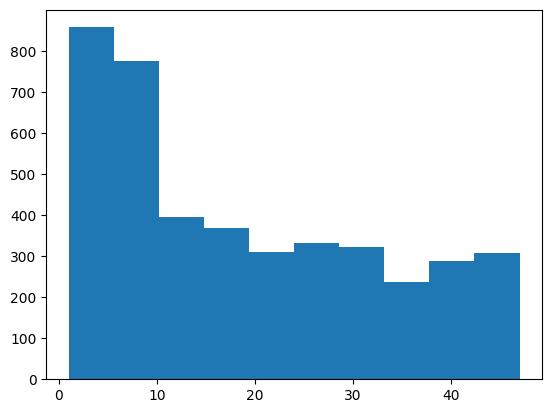

In [153]:
# 가입기간
import matplotlib.pyplot as plt
plt.hist(customer_join["membership_period"])
plt.show()

# 탈퇴회원과 지속회원의 차이 파악

In [154]:
# 탈퇴회원
customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
customer_end.describe()

start_date             end_date  is_deleted         price  \
count                 1350                 1350      1350.0   1350.000000   
mean   2018-01-20 10:45:20  2018-10-17 16:23:28         1.0   8595.555556   
min    2016-05-01 00:00:00  2018-04-30 00:00:00         1.0   6000.000000   
25%    2017-10-01 00:00:00  2018-06-30 00:00:00         1.0   6000.000000   
50%    2018-03-01 00:00:00  2018-10-31 00:00:00         1.0   7500.000000   
75%    2018-06-03 00:00:00  2019-01-31 00:00:00         1.0  10500.000000   
max    2019-02-11 00:00:00  2019-03-31 00:00:00         1.0  10500.000000   
std                    NaN                  NaN         0.0   1949.163652   

              mean       median          max          min  routine_flg  \
count  1350.000000  1350.000000  1350.000000  1350.000000  1350.000000   
mean      3.865474     3.621852     6.461481     1.821481     0.456296   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     3.000000     4.000000     1.000000     0.000000   
50%       4.000000     4.000000     7.000000     2.000000     0.000000   
75%       4.666667     4.500000     8.000000     2.000000     1.000000   
max       9.000000     9.000000    13.000000     8.000000     1.000000   
std       1.246385     1.270847     2.584021     0.976361     0.498271   

                 calc_date  membership_period  
count                 1350        1350.000000  
mean   2018-10-17 16:23:28           8.026667  
min    2018-04-30 00:00:00           1.000000  
25%    2018-06-30 00:00:00           4.000000  
50%    2018-10-31 00:00:00           7.000000  
75%    2019-01-31 00:00:00          11.000000  
max    2019-03-31 00:00:00          23.000000  
std                    NaN           5.033692

In [155]:
# 현재회원
customer_stay = customer_join.loc[customer_join["is_deleted"] == 0]
customer_stay.describe()

start_date end_date  is_deleted         price  \
count                           2842        0      2842.0   2842.000000   
mean   2017-04-03 22:42:28.627726848      NaT         0.0   8542.927516   
min              2015-05-01 00:00:00      NaT         0.0   6000.000000   
25%              2016-05-01 00:00:00      NaT         0.0   6000.000000   
50%              2017-04-01 00:00:00      NaT         0.0   7500.000000   
75%              2018-04-05 00:00:00      NaT         0.0  10500.000000   
max              2019-03-15 00:00:00      NaT         0.0  10500.000000   
std                              NaN      NaN         0.0   1977.189779   

              mean       median          max          min  routine_flg  \
count  2842.000000  2842.000000  2842.000000  2842.000000  2842.000000   
mean      6.030288     6.024279     8.471147     3.620690     0.984166   
min       3.166667     3.000000     5.000000     1.000000     0.000000   
25%       4.833333     5.000000     7.000000     2.000000     1.000000   
50%       5.583333     5.500000     8.000000     3.000000     1.000000   
75%       7.178030     7.000000    10.000000     5.000000     1.000000   
max      12.000000    12.000000    14.000000    12.000000     1.000000   
std       1.553587     1.599765     1.571048     2.030488     0.124855   

                 calc_date  membership_period  
count                 2842        2842.000000  
mean   2019-04-30 00:00:00          23.970443  
min    2019-04-30 00:00:00           1.000000  
25%    2019-04-30 00:00:00          12.000000  
50%    2019-04-30 00:00:00          24.000000  
75%    2019-04-30 00:00:00          35.000000  
max    2019-04-30 00:00:00          47.000000  
std                    NaN          13.746761

In [156]:
customer_join.to_csv("./data/customer_join.csv", index=False)